<a href="https://colab.research.google.com/github/karrohan/EDA_Project1/blob/main/EDA_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Airbnb Bookings Analysis***


##### <font size='5px'>**Project Type**    - **Exploratory Data Analysis**
##### **Contribution**    - Individual

# **Problem Statement**


As Airbnb expands and grows, it is critical for the company to use data analysis to gain insights into the behavior and performance of Airbnb hosts and customers, and to use this knowledge to inform business decisions and identify opportunities for growth and innovation. The purpose is to study the aspects that generate success on Airbnb, such as effective host traits, demand for listings in different regions, and the factors that influence pricing and demand. The goal is to use data to forecast things like as demand, pricing, and the busiest hosts, as well as to find places where Airbnb may improve or expand its services. Understanding these aspects enables Airbnb to make informed decisions about how to optimize its platform and services in order to better fulfill the demands of its consumers and promote sustained development and success.








#### **Defining our Business Objective**

The business goal of this project is to use data analysis to identify the characteristics of successful hosts, understand the demand for listings in different locations, identify new markets or demographics to target with marketing efforts, and predict factors such as pricing and demand.


## **Knowing the Data**

### Import Libraries

In [36]:
# Import necessary Libraries
import numpy as np
import pandas as pd

#Importing Data Visualization libraries
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from scipy.stats import norm

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

#Import warnings are issued to alert developers to potential issues with their
#code, and it is important to address these warnings in order to avoid potential problems.
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [ ]:
#Attachment of google drive to colab to access necessary files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Loading Dataset
# storing path of the data in variable name data_link
data_link = '/content/drive/MyDrive/Colab Notebooks/Almabetter/EDA/Airbnb NYC 2019.csv'

#using 'pd.read_csv' function to load csv file, it takes a file path or URL as an
#input, and returns a DataFrame that contains the data from the CSV file

airbnb_df = pd.read_csv(data_link)

## Dataset First View

In [7]:
# First Look of the dataset
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [11]:
print(f'The shape of the airbnb dataframe is {airbnb_df.shape}')

The shape of the airbnb dataframe is (48895, 16)


### Dataset Information

In [12]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [15]:
# Dataset Duplicate rows Count

len(airbnb_df[airbnb_df.duplicated()])

0

#### Missing Values

In [24]:
# Missing Values Count
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

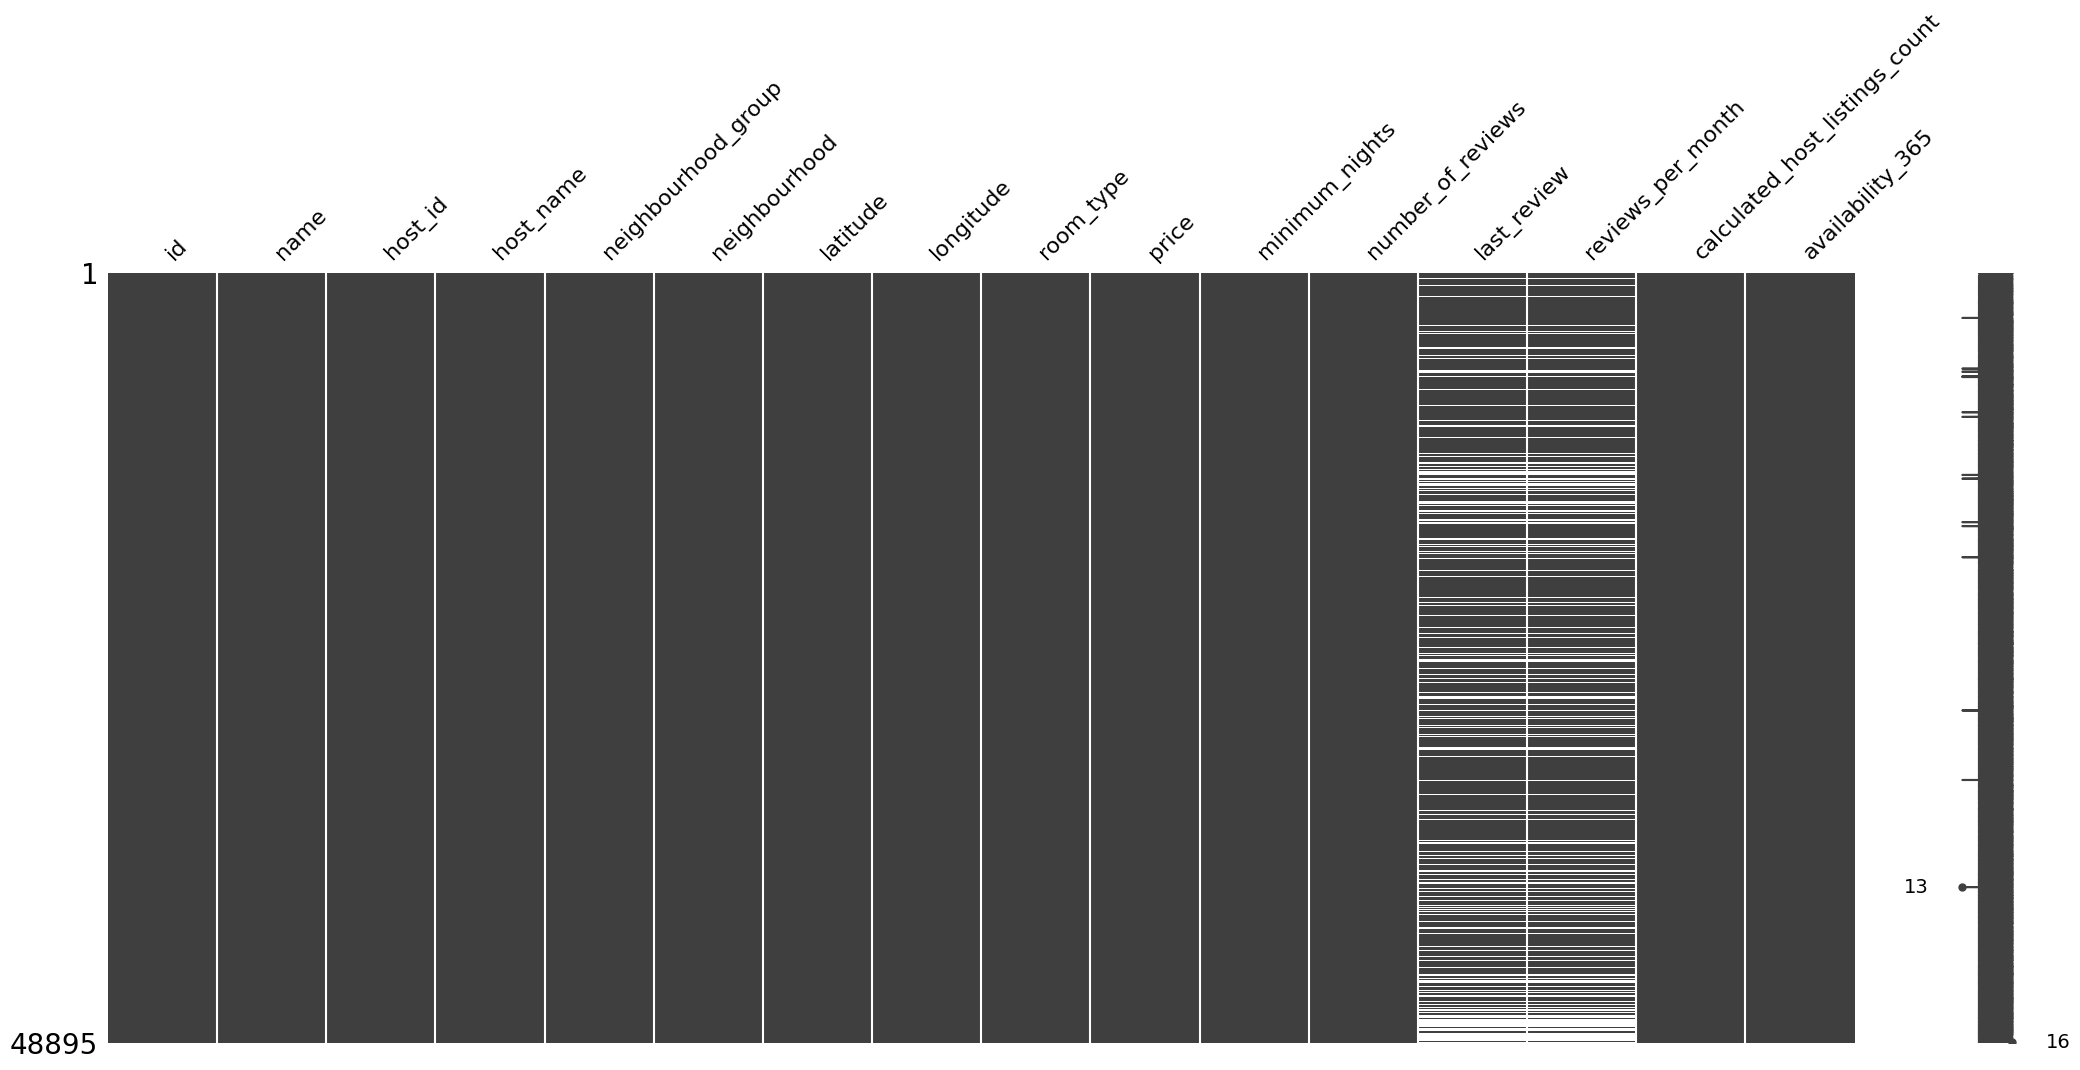

In [42]:
# Visualizing the missing values using msno library
# visualizing the pattern of missing values
msno.matrix(airbnb_df)

<Axes: >

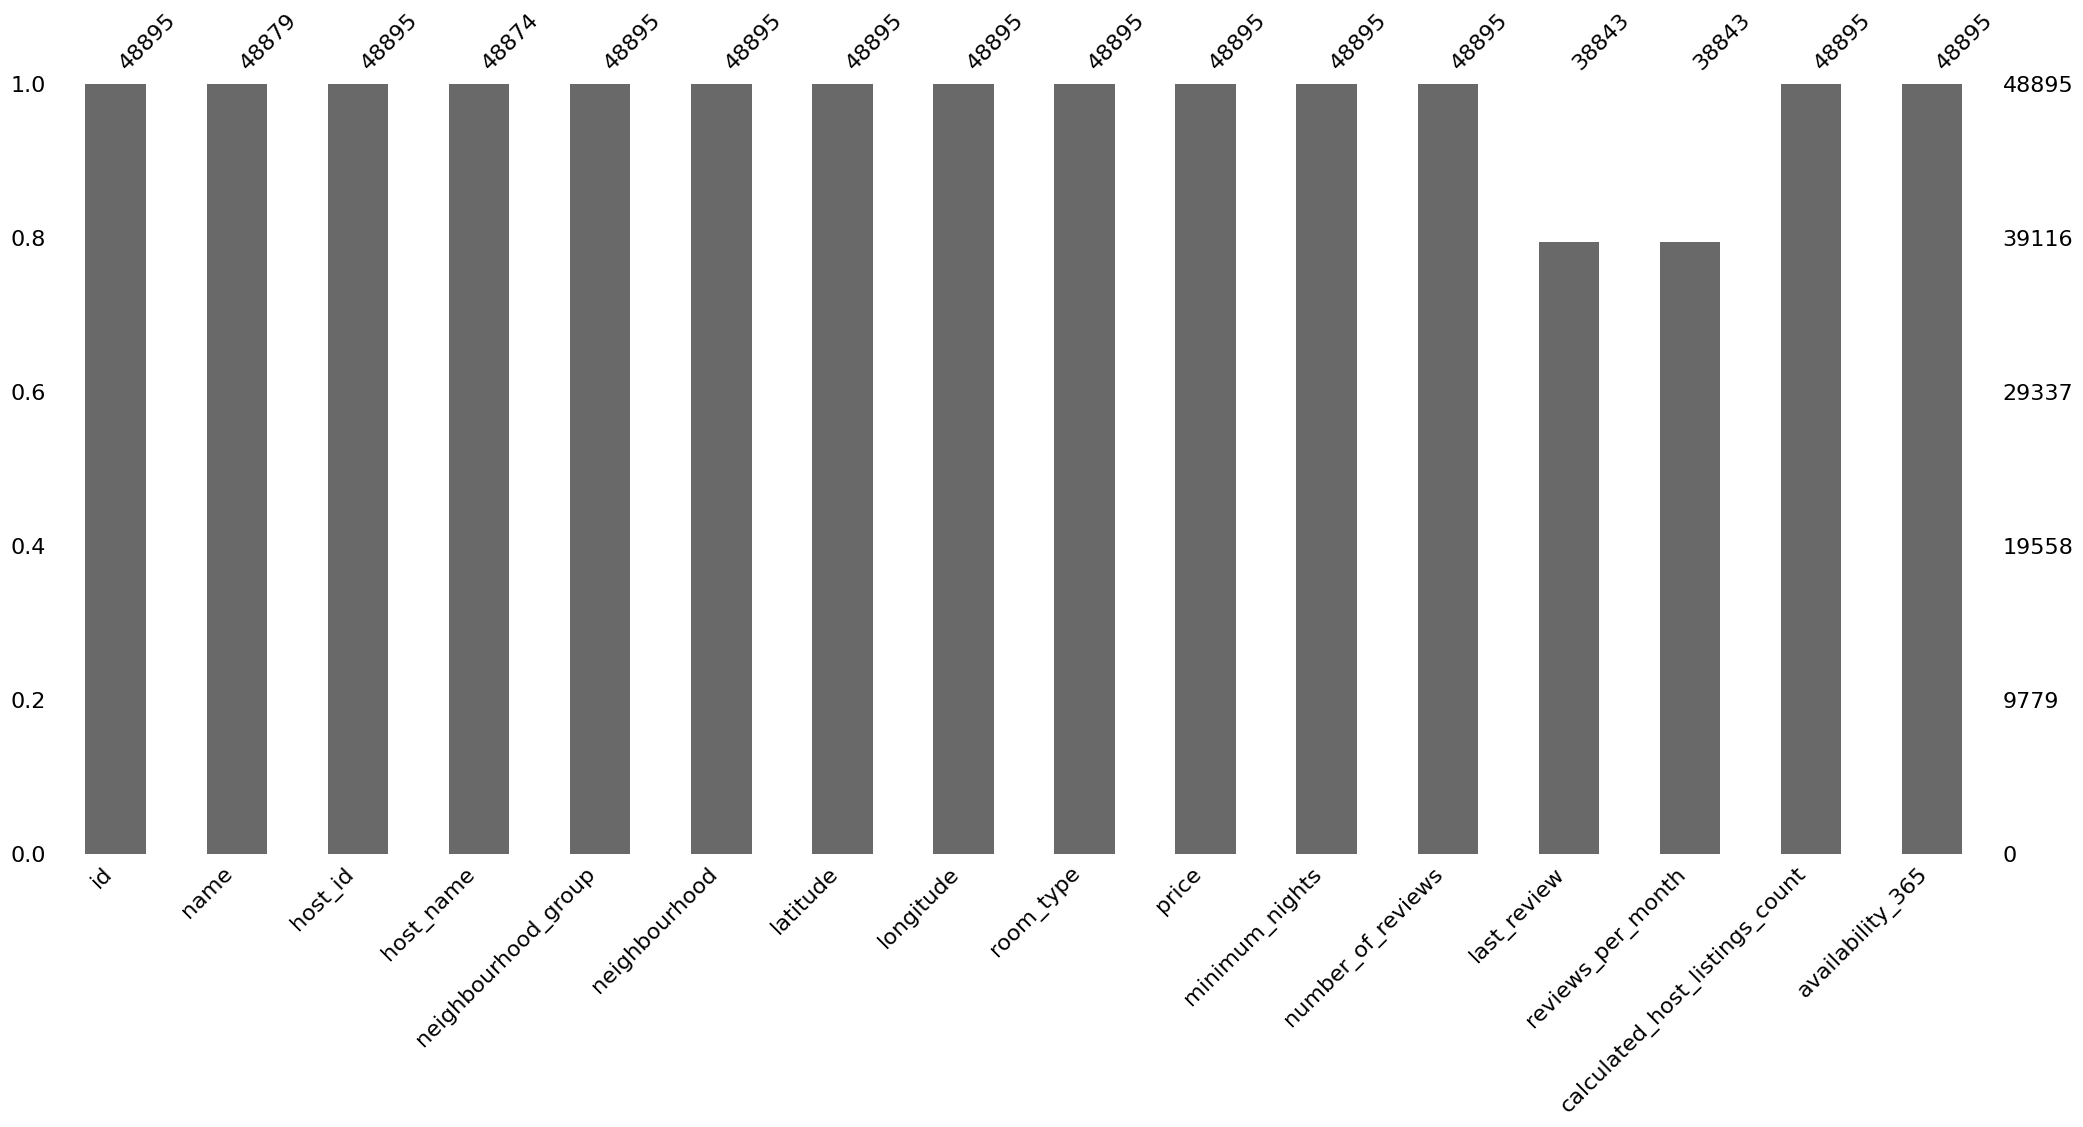

In [43]:
#visulaizing the bar plot of missing values in numbers
msno.bar(airbnb_df)